In [92]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [102]:
N = 6

motifs = []

for i in range(N + 1) :
  motifs.append([])

G = nx.Graph()
G.add_node(0)
motifs[1].append(G)

for i in np.arange(2,N + 1,1) :
  for g in motifs[i - 1] :
    # Generate new graphs from g
    edges = i - 1 

    for mask in range(2**edges) :
      if mask == 0 :
        continue 

      new_g = g.copy()
      
      for node in range(i - 1) :
        if (mask & (1 << node)) > 0 : 
          new_g.add_edge(node,i - 1)
          
      #check if new_g is isomorphis to all existing motifs
      motif_found = False

      for motif in motifs[i] : 
        if nx.is_isomorphic(motif , new_g) : 
          motif_found = True
          break

      if motif_found == False : 
        motifs[i].append(new_g)

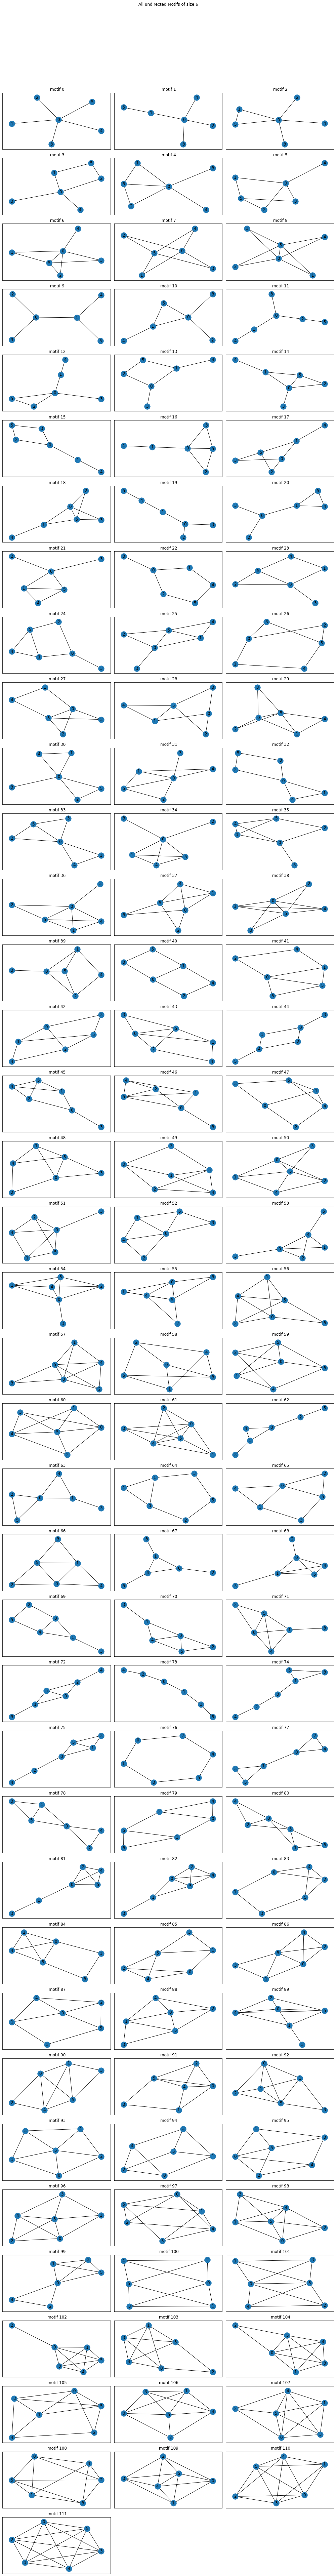

In [147]:
n = 6

motif_count = len(motifs[n])

plt.figure(figsize = (14, motif_count))

plt.suptitle('All undirected Motifs of size ' + str(n))

for i in range(motif_count) : 
  ax = plt.subplot(int((motif_count + 2)/3),3  , i+1)
  plt.title(' motif ' + str(i))
  nx.draw_networkx(motifs[n][i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])